In [1]:
from quantumnet.components import Network, Host, Controller
from quantumnet.objects import Qubit, Logger
from random import randint

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


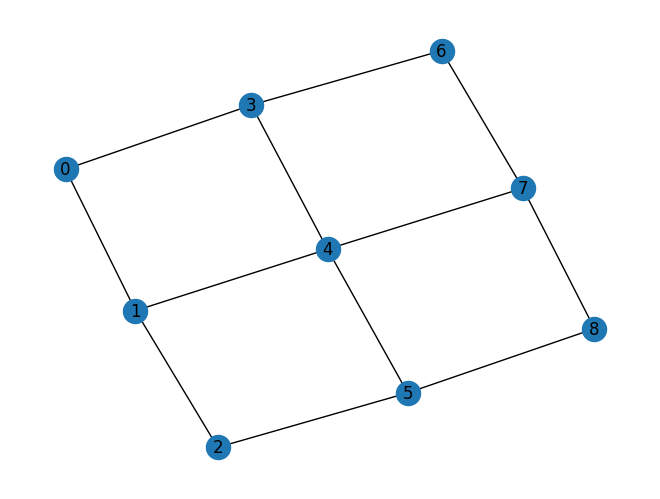

In [2]:
rede = Network()
controlador = Controller(rede)
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
controlador.register_routing_tables()
print("Tabela de roteamento dos hosts:")
for host_id in rede.hosts:
    print(rede.get_host(host_id).routing_table)

Tabela de roteamento dos hosts:
{0: [0], 3: [0, 3], 1: [0, 1], 6: [0, 3, 6], 4: [0, 3, 4], 2: [0, 1, 2], 7: [0, 3, 6, 7], 5: [0, 3, 4, 5], 8: [0, 3, 6, 7, 8]}
{1: [1], 0: [1, 0], 4: [1, 4], 2: [1, 2], 3: [1, 0, 3], 7: [1, 4, 7], 5: [1, 4, 5], 6: [1, 0, 3, 6], 8: [1, 4, 7, 8]}
{2: [2], 1: [2, 1], 5: [2, 5], 0: [2, 1, 0], 4: [2, 1, 4], 8: [2, 5, 8], 3: [2, 1, 0, 3], 7: [2, 1, 4, 7], 6: [2, 1, 0, 3, 6]}
{3: [3], 0: [3, 0], 6: [3, 6], 4: [3, 4], 1: [3, 0, 1], 7: [3, 6, 7], 5: [3, 4, 5], 2: [3, 0, 1, 2], 8: [3, 6, 7, 8]}
{4: [4], 1: [4, 1], 3: [4, 3], 7: [4, 7], 5: [4, 5], 0: [4, 1, 0], 2: [4, 1, 2], 6: [4, 3, 6], 8: [4, 7, 8]}
{5: [5], 2: [5, 2], 4: [5, 4], 8: [5, 8], 1: [5, 2, 1], 3: [5, 4, 3], 7: [5, 4, 7], 0: [5, 2, 1, 0], 6: [5, 4, 3, 6]}
{6: [6], 3: [6, 3], 7: [6, 7], 0: [6, 3, 0], 4: [6, 3, 4], 8: [6, 7, 8], 1: [6, 3, 0, 1], 5: [6, 3, 4, 5], 2: [6, 3, 0, 1, 2]}
{7: [7], 4: [7, 4], 6: [7, 6], 8: [7, 8], 1: [7, 4, 1], 3: [7, 4, 3], 5: [7, 4, 5], 0: [7, 4, 1, 0], 2: [7, 4, 1, 2]}
{8: [8

In [4]:
n_requests = 10

for n in range(n_requests):
    random_alice = randint(0, len(rede.hosts)-1)
    random_bob = randint(0, len(rede.hosts)-1)
    route = rede.get_host(random_alice).routing_table[random_bob]
    controlador.check_route(route)
    controlador.announce_to_route_nodes(route)
    controlador.announce_to_alice_and_bob(route)
    rede.application_layer.qkd_e91_protocol(random_alice, random_bob, 10)
    rede.get_host(random_alice).announce_to_controller_app_has_finished()

Nó 3 informado.
Nó 4 informado.
Nó 5 informado.
Alice 0 e Bob 5 informados.
Host 0 informou ao controlador que a aplicação terminou.
Nó 3 informado.
Nó 4 informado.
Nó 5 informado.
Alice 0 e Bob 5 informados.
Host 0 informou ao controlador que a aplicação terminou.
Nó 1 informado.
Alice 0 e Bob 1 informados.
Host 0 informou ao controlador que a aplicação terminou.
Nó 7 informado.
Alice 6 e Bob 7 informados.
Host 6 informou ao controlador que a aplicação terminou.
Nó 3 informado.
Alice 4 e Bob 3 informados.
Host 4 informou ao controlador que a aplicação terminou.
Nó 1 informado.
Nó 0 informado.
Nó 3 informado.
Alice 2 e Bob 3 informados.
Host 2 informou ao controlador que a aplicação terminou.
Nó 3 informado.
Nó 4 informado.
Nó 5 informado.
Alice 0 e Bob 5 informados.
Host 0 informou ao controlador que a aplicação terminou.
Nó 8 informado.
Alice 7 e Bob 8 informados.
Host 7 informou ao controlador que a aplicação terminou.
Nó 1 informado.
Nó 0 informado.
Alice 2 e Bob 0 informados.
Host

In [5]:
rede.get_total_useds_qubits()

748